# Skyscrapers and Humans
By Cyric Ng

20 March 2023

# 1. Introduction

With the standard of living rising all over the world and more people moving to cities, buildings are getting taller and taller. In The Atlantic's "How Skyscrapers Can Save a City", many benefits of these sky-rise cities were mentioned. Skyscrapers can make cities more affordable and make cities greener, compared to urban sprawl (Glaesar, 2011). As many cities across the U.S. are trying close off roads, improve bike lanes, and create more pedestrian-friendly areas, building skyscrapers can help congregate more people at these locations. An example is New York City, which is one of the cities with the most skyscrapers in the world, recently closed off a busy road on Broadway to create room for pedestrians. My biggest motivation for this project comes from my background growing up in Hong Kong. Hong Kong is the city with the most skyscrapers in the world and coming to the United States shocked me with how few skyscrapers there are. Skyscrapers provide the convenience of linking commercial, retail, and living spaces together.  While big cities in the U.S. have skyscrapers, the numbers compared to cities in Asia are still astoundingly low. All across the world, not only do skyscrapers provide retail, office, and living spaces for people, but some have even become attractions known for their height. The increase in skyscrapers can potentially solve problems such as housing inequality occurring in many major U.S. cities such as New York City and San Francisco (Florida, 2016). This project seeks to answer several main questions about skyscrapers and their locations. While this is focused on U.S. cities, the results will still provide an interesting relationship between people and skyscrapers. This project revolves around one main topic, which is how the demographic of U.S. cities corresponds with skyscrapers. Prior studies have looked at the density of skyscrapers within 2km of the downtown area, but not the entire city and other demographic variables (The Council on Tall Buildings and Urban Habitat). Using these demographic measures, we can uncover if there is a relationship between both and whether skyscrapers are "going to save the city".

# 2. Methods

**2.1 - Data** 

This project uses two main data sets: skyscrapers and census data sets for each city. The skyscrapers data set is provided and organized by the CORGIS Dataset Project. Updated data and data for more cities could be found on the Council on Tall Buildings and Urban Habitat, where the CORGIS data set collected the information; however, membership of the group is needed to access and download the data. For this project, the CORGIS dataset provides enough information for the analysis. The skyscraper dataset includes information on each skyscraper in the U.S., which the height, material of the building, the city location, the location latitude and longitude, the name of the building, the year completed, and whether it is completed or still in the visionary process. This data set is used in Excel to be created as new data set to include only skyscrapers that are completed, under construction, and have a height above 0 m. Additional clean-ups to reduce other variables were done using Python in this notebook.

The second data set used is from Census. CORGIS data sets provided county and state data, which was originally the aim of this project. However, further analysis showed that many cities of interest crossed over to several counties which made it difficult for the data to work with. In order to only focus on the cities, specific data for each city were pulled from Census and combined into one file. Since a maximum of six cities can be pulled each time, a total of thirty cities were chosen for this study. This is also valid since the top thirty cities were focused as cities after the top thirty did not have that many skyscrapers to provide a well-established analysis.

*Skyscraper Data Set* :
https://corgis-edu.github.io/corgis/csv/skyscrapers/


*Cities Demographics Data Set* :
https://www.census.gov/quickfacts/fact/table/US/PST045222


**2.2 - Analytical Process**

The project will be split into two analytical parts, with one small supplementary analysis to introduce the history of skyscrapers and the second part will be to analyze the relationship between skyscrapers and humans. Although it is not the main focus of the project, a small part of the analysis of skyscrapers will be analyzed to see the changes through time. As skyscrapers become taller, the changes in building materials will be looked at to see if there is a trend as well. A map of all the provided skyscrapers in the data set will be separated into layers by height to show the overall spatial distribution of skyscrapers in the U.S., which is made using folium.  Additionally, the materials will be analyzed in a box plot to visualize the relationship between height and materials.  

The main part of the analysis is to uncover the relationship between skyscrapers and population. The number of skyscrapers in each city will be the main focus. As mentioned, the top thirty cities will be focused on since cities after had very few skyscrapers. Out of our cities of interest, the least is Cinnicinati with 13 skyscrapers, and the most is New York City with 586 skyscrapers. The number of skyscrapers in each city is compared with the population, population per square mile, median household income, owner-occupied housing rate, median gross rent, and mean travel time to work. This project focuses on these demographic areas since it can see if the number of skyscrapers correlates with the demographic behaviors of a population. Some of these variables are the main drivers of people living in cities such as rent, owner housing rate, and travel time to work. One of the biggest conceptions of living in cities with skyscrapers is convenience; however, travel time to work will uncover if this is true or a misconception. Additionally, are people living in cities with more skyscrapers having a higher income or lower income? Since many of these variables are crucial, they will be used for the analysis process through scatter plots to find the relationship between the two. Scatter plots will be made using matplotlib.pyplot. Furthermore, the trend (negative/positive/no trend) will be analyzed with the R-squared to determine if there are strong relationships between the number of skyscrapers and specific variables of interest. The correlation and r2 will be calculated using scipy.stats.  



# 3. Results

**3.1 - Data Exploration**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import folium

In [2]:
sky_og = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/skyscrapers/skyscrapers.csv')
cities_dem = pd.read_csv('City Census Values.csv')
sky_com = pd.read_csv('skyscrapers_completed.csv')

In [3]:
sky_fix = (sky_og['status.current'] != 'proposed') & (sky_og['status.current'] != 'vision') & (sky_og['status.current'] != 'never completed') & (sky_og['status.current'] != 'achitercturally topped out') & (sky_og['status.current'] != 'demolished') & (sky_og['status.current'] != 'structurally topped out')& (sky_og['status.current'] != 'on hold')&(sky_og['statistics.height'] != '0.000000')
sky = sky_og[sky_fix]

In [4]:
sky_100 = sky_com.loc[sky_com['statistics.height'] <= 100]
sky_101_150 = sky_com.loc[(sky_com['statistics.height'] >100) &(sky_com['statistics.height'] <=150)]
sky_151_200 = sky_com.loc[(sky_com['statistics.height'] >150) &(sky_com['statistics.height'] <=200)]
sky_200_300 = sky_com.loc[(sky_com['statistics.height'] >200) &(sky_com['statistics.height'] <=300)]
sky_300p = sky_com.loc[sky_com['statistics.height'] > 300]

In [5]:
m = folium.Map(location=[sky['location.latitude'].astype(float).mean(), sky['location.longitude'].astype(float).mean()], zoom_start=6)

fg_100 = folium.FeatureGroup(name="100m or less")
fg_101_150 = folium.FeatureGroup(name="101m - 150m")
fg_151_200 = folium.FeatureGroup(name="151m - 200m")
fg_200_300 = folium.FeatureGroup(name="201m - 300m")
fg_300p = folium.FeatureGroup(name="Over 300m")

for index, row in sky_100.iterrows():
    lat = float(row['location.latitude'])
    lng = float(row['location.longitude'])
    name = row['name']
    folium.Marker(location=[lat, lng],popup=name).add_to(fg_100)

for index, row in sky_101_150.iterrows():
    lat = float(row['location.latitude'])
    lng = float(row['location.longitude'])
    name = row['name']
    folium.Marker(location=[lat, lng],popup=name).add_to(fg_101_150)

for index, row in sky_151_200.iterrows():
    lat = float(row['location.latitude'])
    lng = float(row['location.longitude'])
    name = row['name']
    folium.Marker(location=[lat, lng],popup=name).add_to(fg_151_200)

for index, row in sky_200_300.iterrows():
    lat = float(row['location.latitude'])
    lng = float(row['location.longitude'])
    name = row['name']
    folium.Marker(location=[lat, lng], popup=name).add_to(fg_200_300)

for index, row in sky_300p.iterrows():
    lat = float(row['location.latitude'])
    lng = float(row['location.longitude'])
    name = row['name']
    folium.Marker(location=[lat, lng], popup=name).add_to(fg_300p)

fg_100.add_to(m)
fg_101_150.add_to(m)
fg_151_200.add_to(m)
fg_200_300.add_to(m)
fg_300p.add_to(m)

folium.LayerControl().add_to(m)

In [6]:
m

**Figure 1.** Map of all the skyscrapers in the U.S (including Hawaii and Alaska). Layers are separated by height in meters, and name of the building is included in the pop up.

In [7]:
sky['statistics.height'].describe()

count    2258.000000
mean      130.963361
std        53.544000
min         0.000000
25%        99.985003
50%       124.000000
75%       155.434998
max       541.299988
Name: statistics.height, dtype: float64

In [8]:
sky.describe()

,id,location.city_id,location.country id,location.latitude,location.longitude,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.completed.year,status.started.year
count,2258.000000,2258.000000,2258.0,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000
mean,11313.651019,1613.162090,163.0,37.466660,-87.691203,35.019043,130.963361,1.108503,1216.002657,1972.724535,1280.479628
std,6618.378340,78.775562,0.0,7.609472,21.689389,12.893074,53.544000,0.335743,681.198397,147.495330,951.796395
min,98.000000,1499.000000,163.0,0.000000,-157.980072,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,4075.500000,1543.000000,163.0,34.062548,-93.268532,26.000000,99.985003,1.000000,632.250000,1969.000000,0.000000
50%,11345.500000,1632.000000,163.0,40.739840,-84.366142,34.000000,124.000000,1.000000,1216.500000,1990.000000,1968.000000
75%,16109.750000,1641.000000,163.0,41.877632,-73.999468,42.000000,155.434998,1.000000,1799.750000,2008.000000,2005.000000
max,24079.000000,2365.000000,163.0,61.215210,0.000000,108.000000,541.299988,4.000000,2423.000000,2019.000000,2016.000000


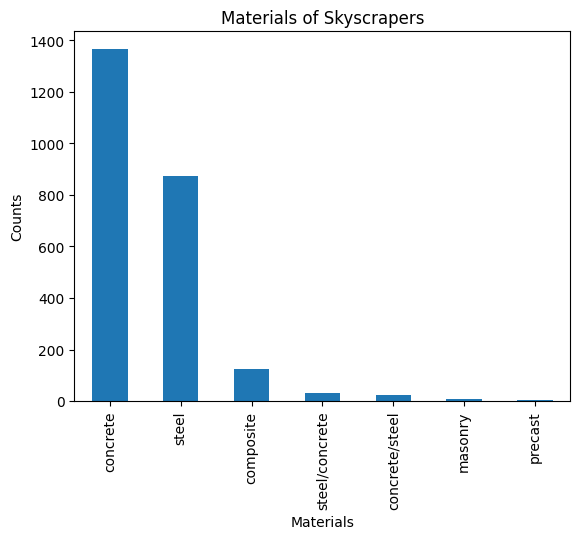

In [24]:
material= sky_og['material'].value_counts()
material.plot(kind='bar')
plt.xlabel('Materials')
plt.ylabel('Counts')
plt.title('Materials of Skyscrapers')
plt.show()

**Figure 2.** The counts of the number of skyscrapers built with the respective materials.

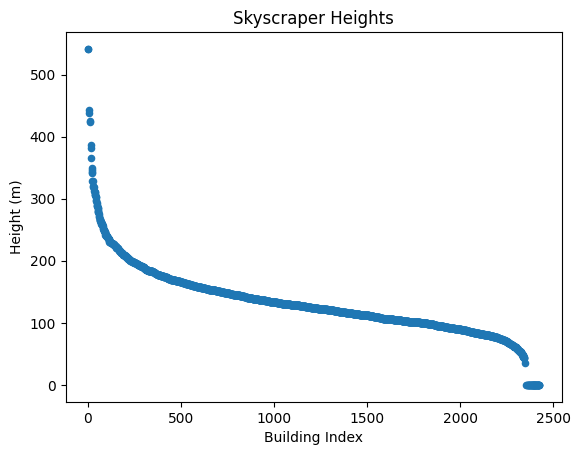

In [25]:
height = pd.DataFrame({'height': sky['statistics.height'], 'index': sky.index})
height.plot(kind='scatter', x='index', y='height')

plt.title('Skyscraper Heights')
plt.ylabel('Height (m)')
plt.xlabel('Building Index')
plt.show()

**Figure 3.** The distribution of skyscraper heights.

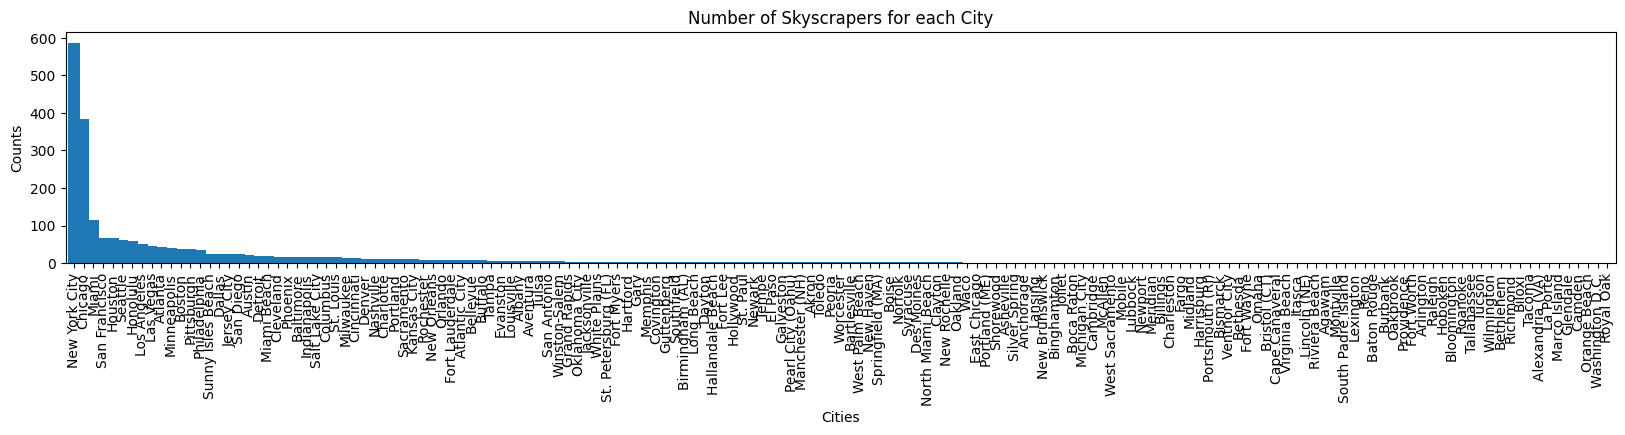

In [28]:
cities = sky['location.city'].value_counts()
cities.plot(kind='bar', width=1.2, figsize=(20,3))
plt.ylabel('Counts')
plt.xlabel('Cities')
plt.title('Number of Skyscrapers for each City')
plt.show()

**Figure 4.** The number of skyscrapers in each city.

In [12]:
city_counts = sky.groupby('location.city')['location.city'].count()
cities_30 = city_counts.nlargest(30)

In [13]:
cities_dem.columns

Index(['City', 'Population Estimates, July 1 2021, (V2021)',
       'Population estimates base, April 1, 2020, (V2021)',
       'Population, percent change - April 1, 2020 (estimates base) to July 1, 2021, (V2021)',
       'Population, Census, April 1, 2020',
       'Population, Census, April 1, 2010', 'Persons under 5 years, percent',
       'Persons under 18 years, percent', 'Persons 65 years and over, percent',
       'Female persons, percent', 'White alone, percent',
       'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent', 'Veterans, 2017-2021',
       'Foreign born persons, percent, 2017-2021',
       'Owner-occupied housing unit rate, 2017-2021',
       'Median value of owner-occupied housing units, 2017-2021'

**3.2 - Analysis**

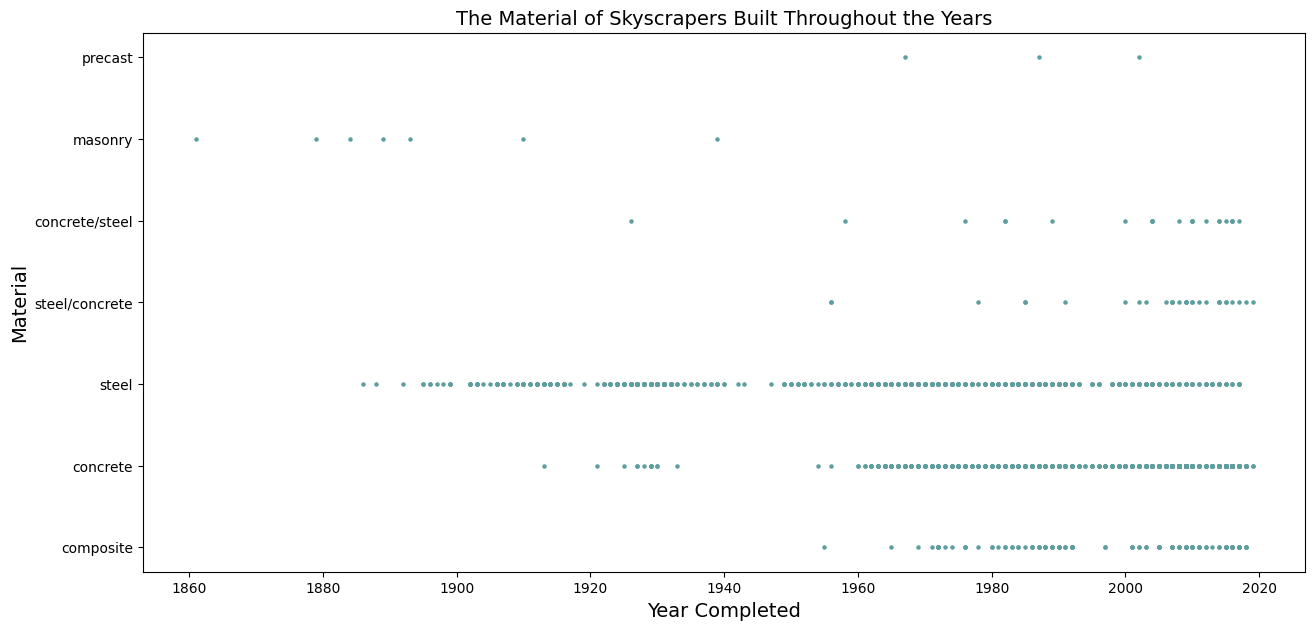

In [14]:
sky_mat = sky.loc[(sky['status.completed.year'] != 0)]
sky_mat.plot(y = 'material',x='status.completed.year',kind='scatter',color='cadetblue',s=5, figsize=(15, 7))
sky_mat.set_ylabel=('Year Completed')
sky_mat.set_xlabel=('Material')
sky.set_title=('title')
plt.ylabel('Material',fontsize=14)
plt.xlabel('Year Completed',fontsize=14)
plt.title('The Material of Skyscrapers Built Throughout the Years',fontsize=14);

**Figure 5.** The changes in skyscraper materials throughout time, with the year completed as the date.

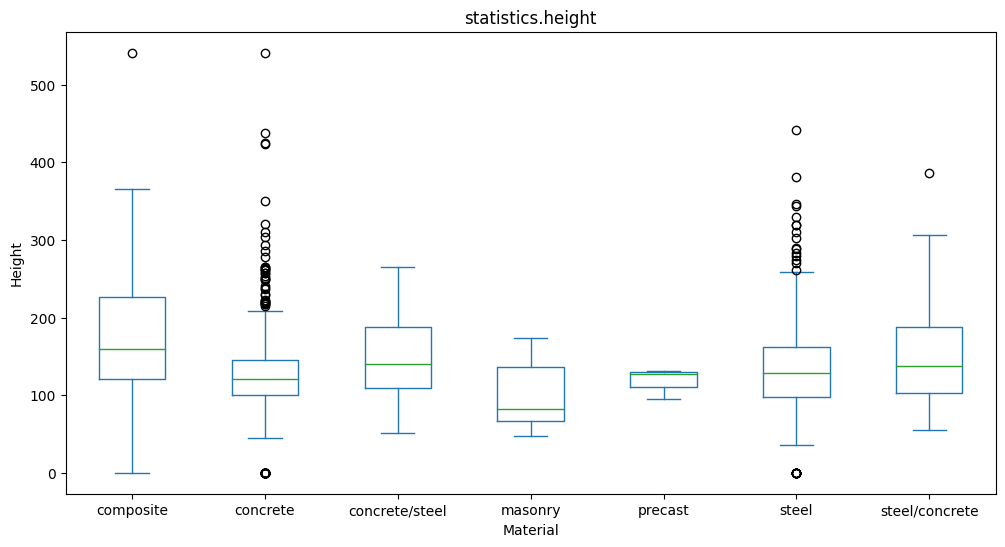

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sky.plot(column='statistics.height', by='material',ax=ax, kind='box')
ax.set_xlabel('Material')
ax.set_ylabel('Height')
plt.show()

**Figure 6.** The height distribution of skyscrapers with different materials shown in a box plot.

In [16]:
cities_df = pd.DataFrame(cities_30.items(), columns=['City', 'Skyscraper'])
city_sky = pd.merge(cities_dem, cities_df, on='City')

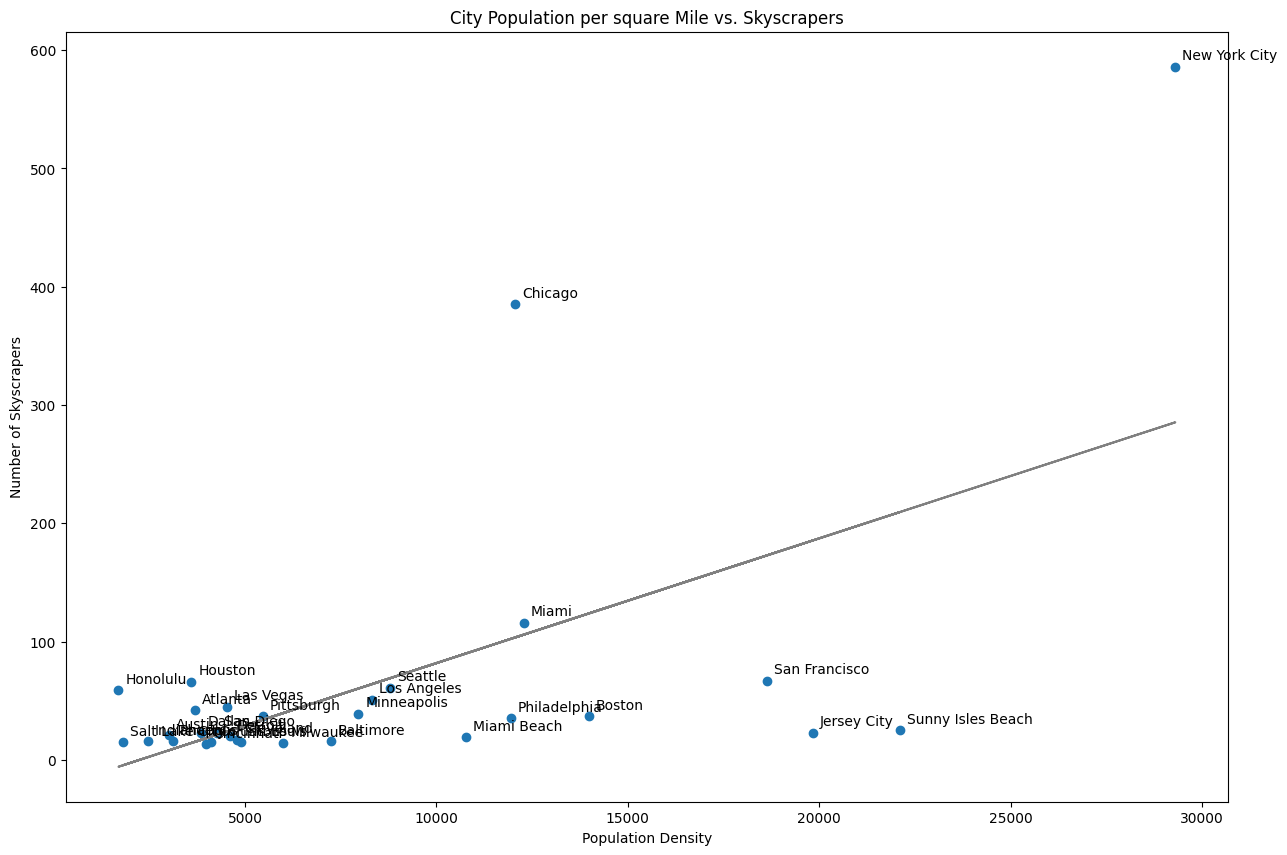

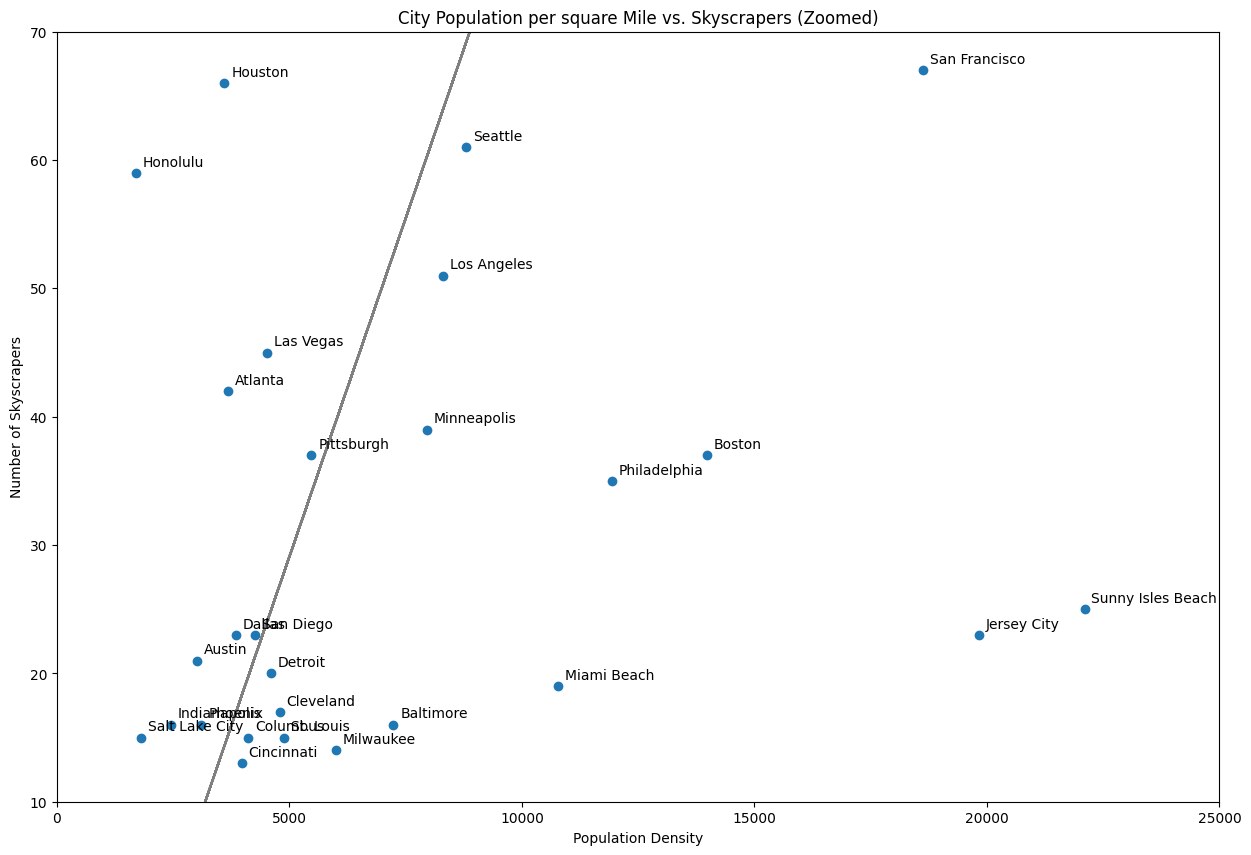

0.35028623429367883


In [17]:
fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Population per square mile, 2020'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y)
ax.set_title('City Population per square Mile vs. Skyscrapers')
ax.set_xlabel('Population Density')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Population per square mile, 2020']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Population per square mile, 2020'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y)
ax.set_title('City Population per square Mile vs. Skyscrapers (Zoomed)')
ax.set_xlabel('Population Density')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Population per square mile, 2020']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
ax.set_xlim([0, 25000])
ax.set_ylim([10, 70])


slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, slope*x + intercept, color='gray')
r_squared = rvalue**2

plt.show()

print(r_squared)

**Figure 7.** Scatter plot of population density and the number of skyscrapers in a city (R-squared: 0.35)

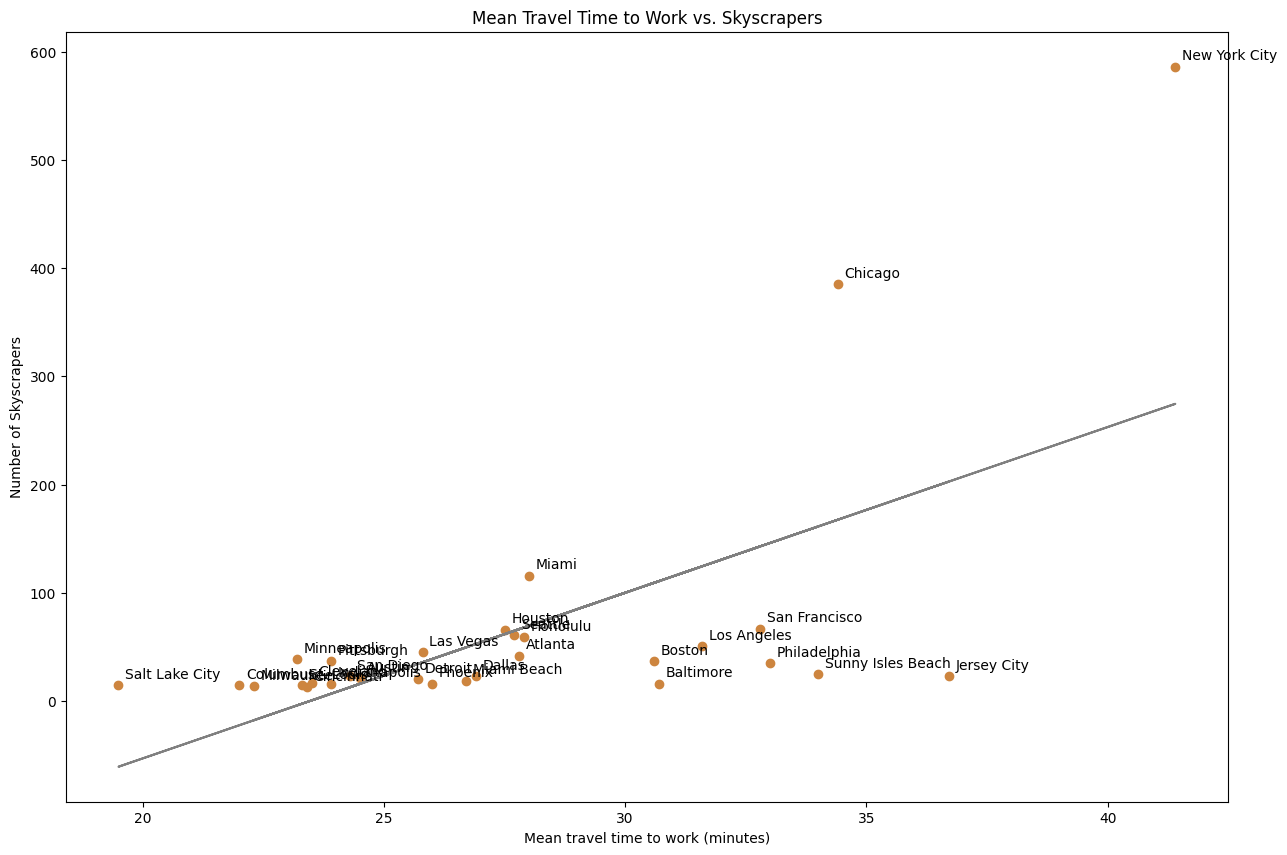

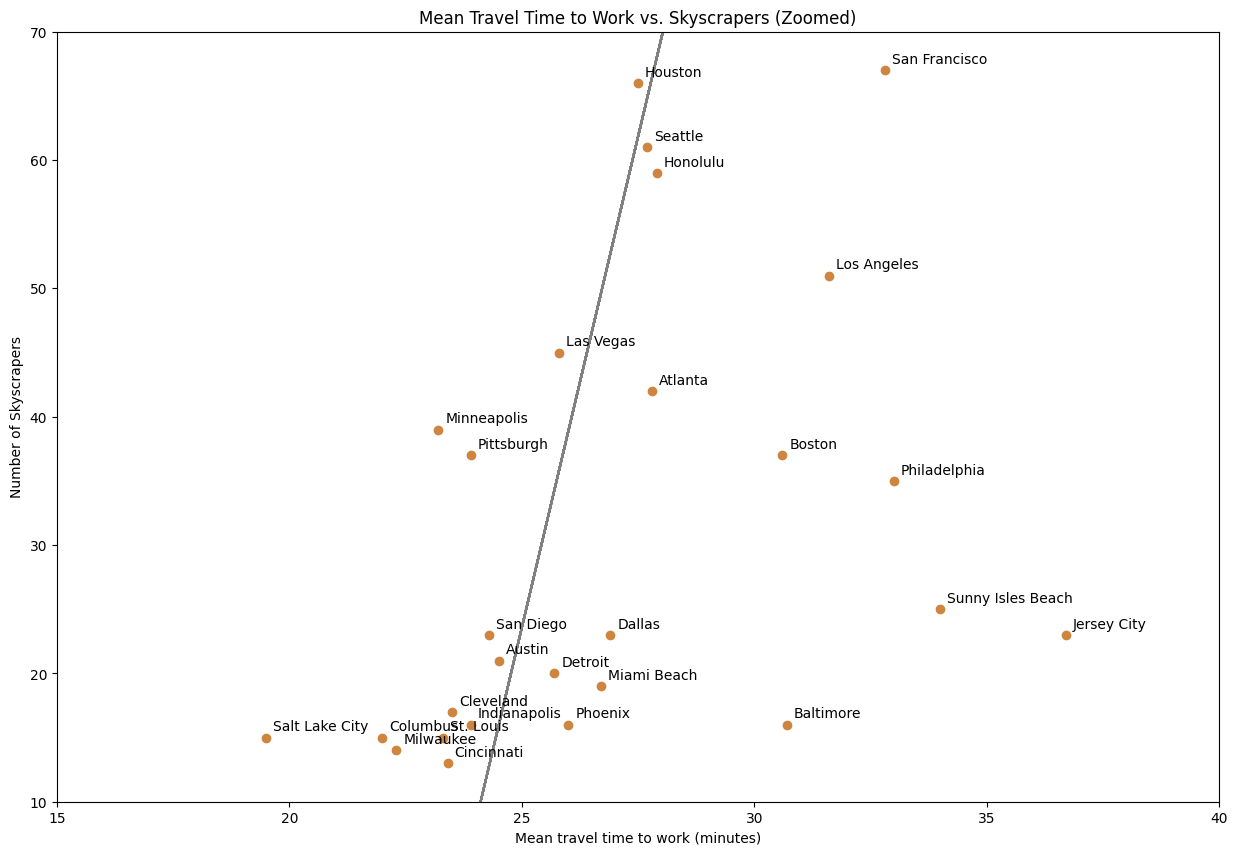

0.39844455906037607


In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Mean travel time to work (minutes), workers age 16 years+, 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='peru')
ax.set_title('Mean Travel Time to Work vs. Skyscrapers')
ax.set_xlabel('Mean travel time to work (minutes)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Mean travel time to work (minutes), workers age 16 years+, 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Mean travel time to work (minutes), workers age 16 years+, 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='peru')
ax.set_title('Mean Travel Time to Work vs. Skyscrapers (Zoomed)')
ax.set_xlabel('Mean travel time to work (minutes)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Mean travel time to work (minutes), workers age 16 years+, 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
ax.set_xlim([15, 40])
ax.set_ylim([10, 70])

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, slope*x + intercept, color='gray')
r_squared = rvalue**2

plt.show()

print(r_squared)

**Figure 8.** Scatter plot of the mean travel time to work, in minutes, and the number of skyscrapers in a city (R-squared: ~0.4)

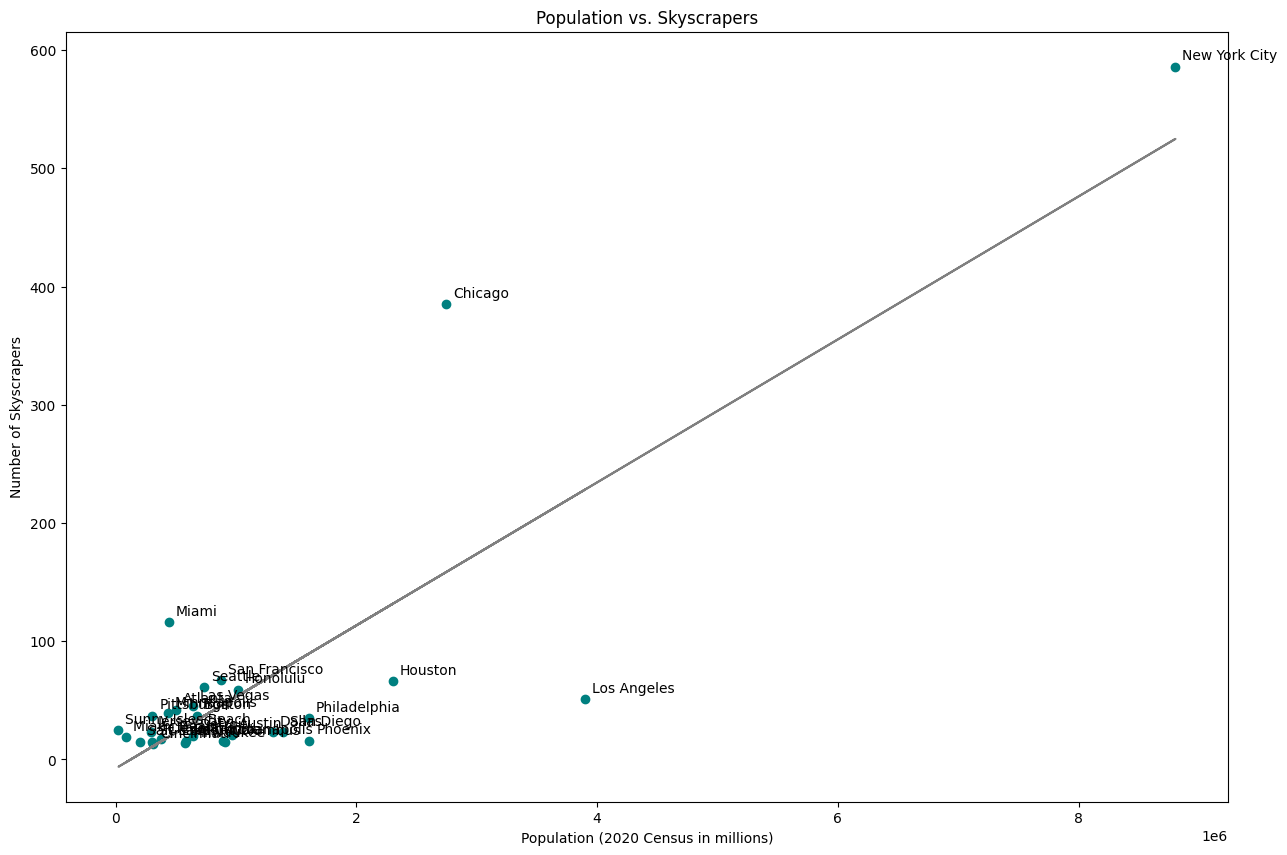

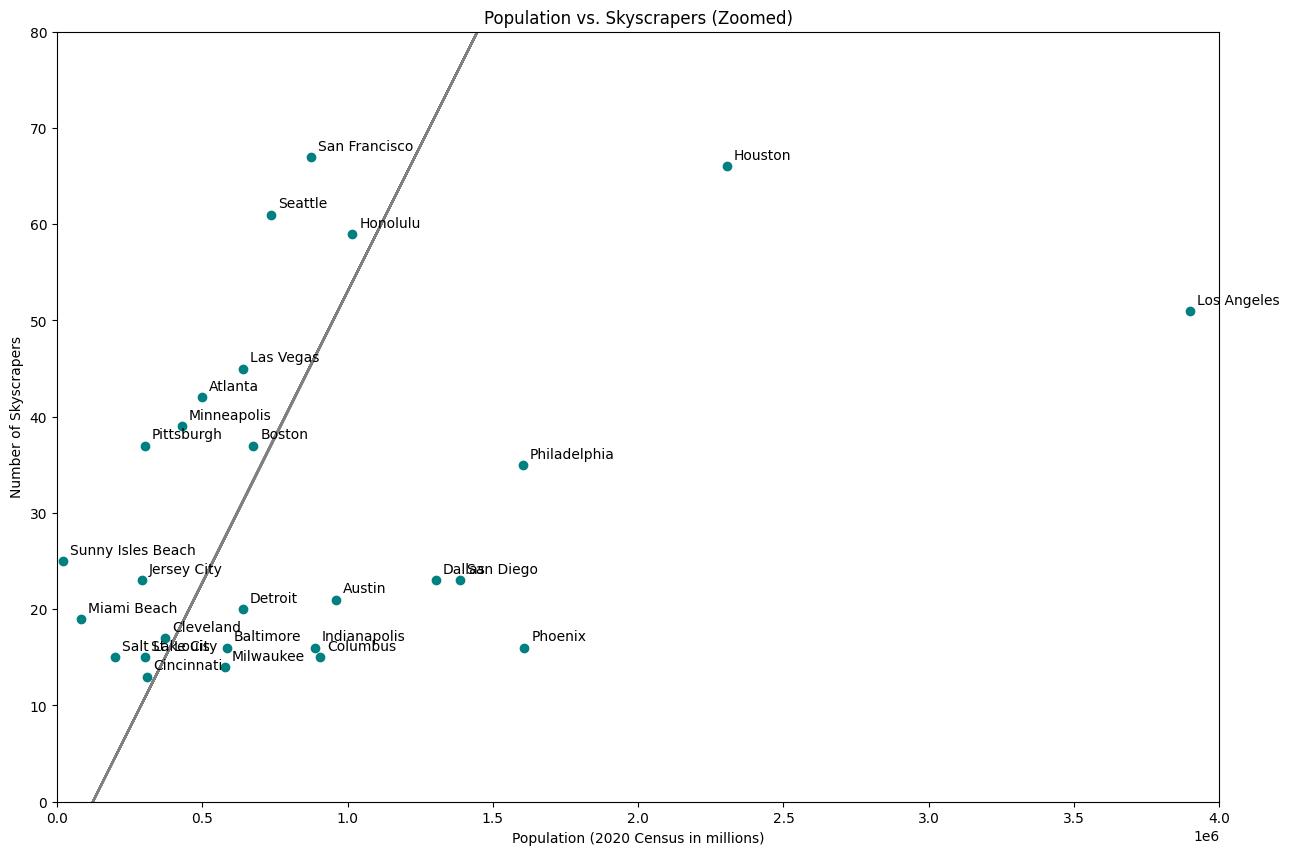

0.7080075065750516


In [19]:
fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky[ 'Population, Census, April 1, 2020'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='teal')
ax.set_title('Population vs. Skyscrapers')
ax.set_xlabel('Population (2020 Census in millions)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row[ 'Population, Census, April 1, 2020']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky[ 'Population, Census, April 1, 2020'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='teal')
ax.set_title('Population vs. Skyscrapers (Zoomed)')
ax.set_xlabel('Population (2020 Census in millions)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row[ 'Population, Census, April 1, 2020']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
ax.set_xlim([0, 4e6])
ax.set_ylim([0, 80])

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, slope*x + intercept, color='gray')
r_squared = rvalue**2

plt.show()

print(r_squared)

**Figure 9.** Scatter plot of the population of a city and the number of skyscrapers in a city (R-squared: ~0.71)

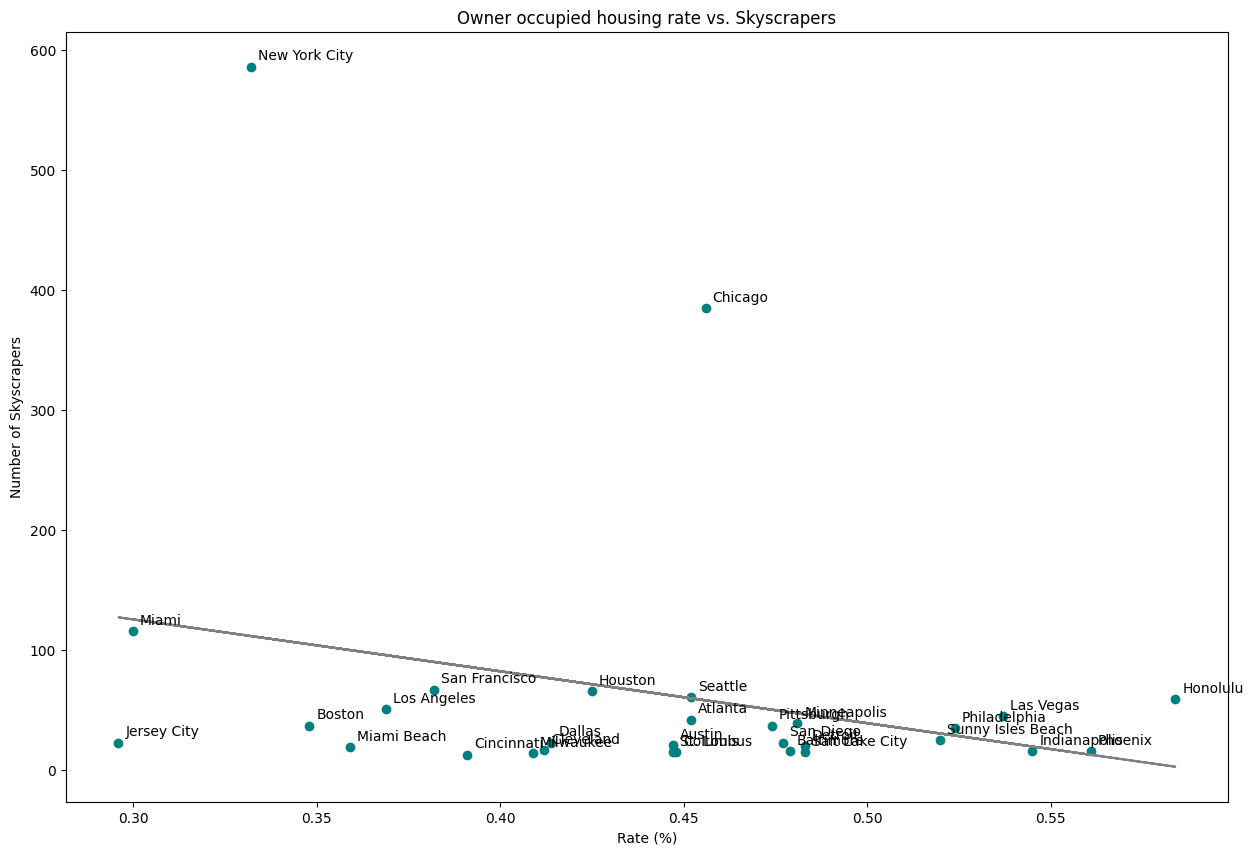

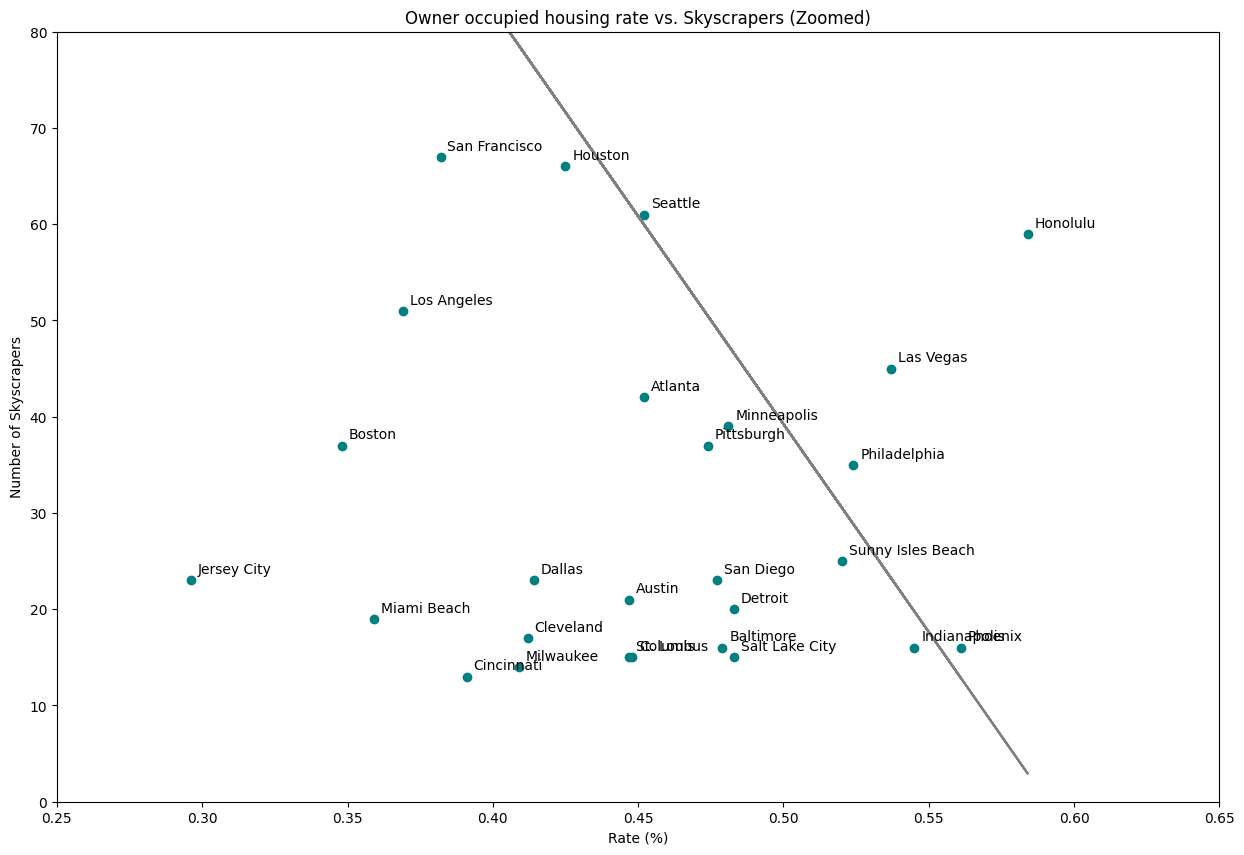

0.07161800736071924


In [20]:
fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Owner-occupied housing unit rate, 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='teal')
ax.set_title('Owner occupied housing rate vs. Skyscrapers')
ax.set_xlabel('Rate (%)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Owner-occupied housing unit rate, 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Owner-occupied housing unit rate, 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='teal')
ax.set_title('Owner occupied housing rate vs. Skyscrapers (Zoomed)')
ax.set_xlabel('Rate (%)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Owner-occupied housing unit rate, 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
ax.set_xlim([0.25, 0.65])
ax.set_ylim([0, 80])

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, slope*x + intercept, color='gray')
r_squared = rvalue**2

plt.show()

print(r_squared)

**Figure 10.** Scatter plot of the owner occupied housing rate and the number of skyscrapers in a city (R-squared: ~0.072)

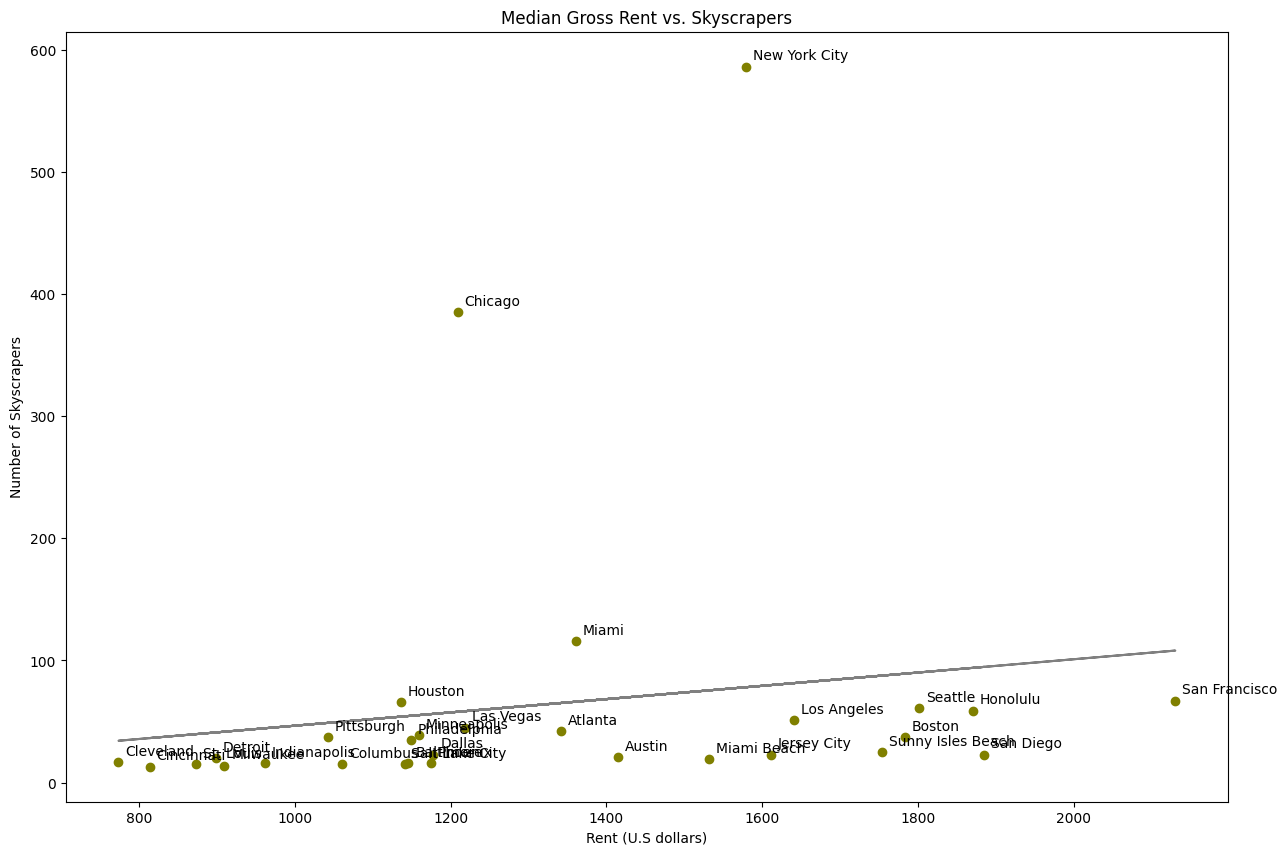

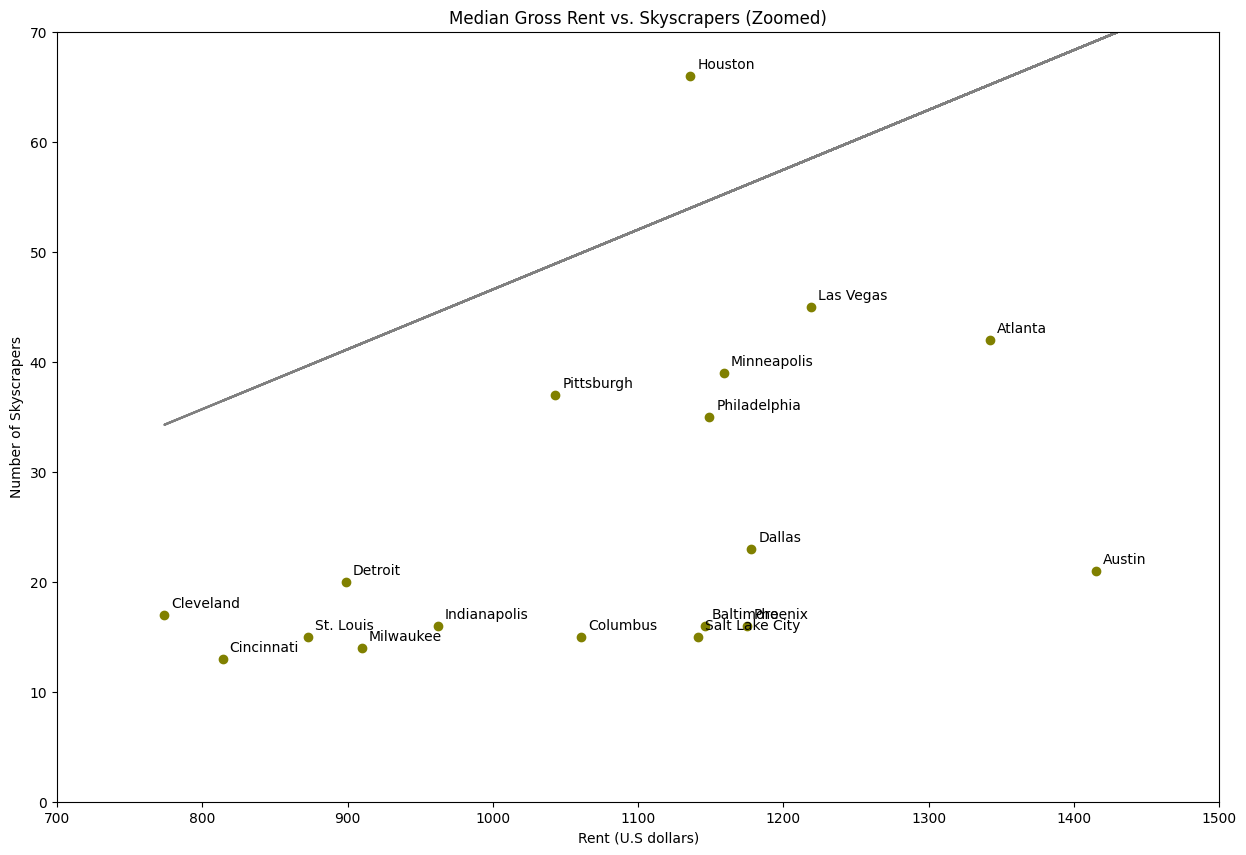

0.027122773801959453


In [21]:
fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Median gross rent, 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='olive')
ax.set_title('Median Gross Rent vs. Skyscrapers')
ax.set_xlabel('Rent (U.S dollars)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Median gross rent, 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Median gross rent, 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='olive')
ax.set_title('Median Gross Rent vs. Skyscrapers (Zoomed)')
ax.set_xlabel('Rent (U.S dollars)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Median gross rent, 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
ax.set_xlim([700, 1500])
ax.set_ylim([0, 70])

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, slope*x + intercept, color='gray')
r_squared = rvalue**2

plt.show()

print(r_squared)

**Figure 11.** Scatter plot of the median gross rent, in U.S dollars, and the number of skyscrapers in a city (R-squared: ~0.027)

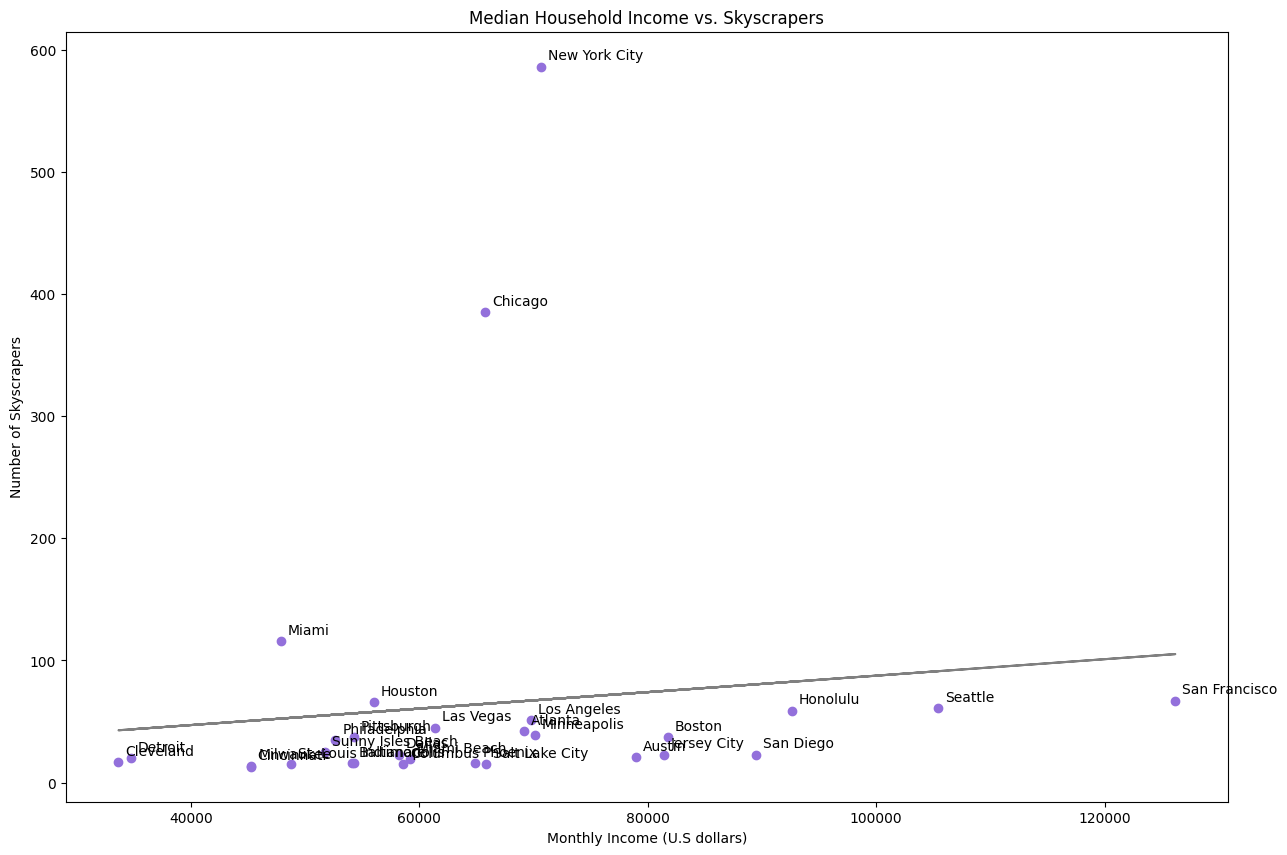

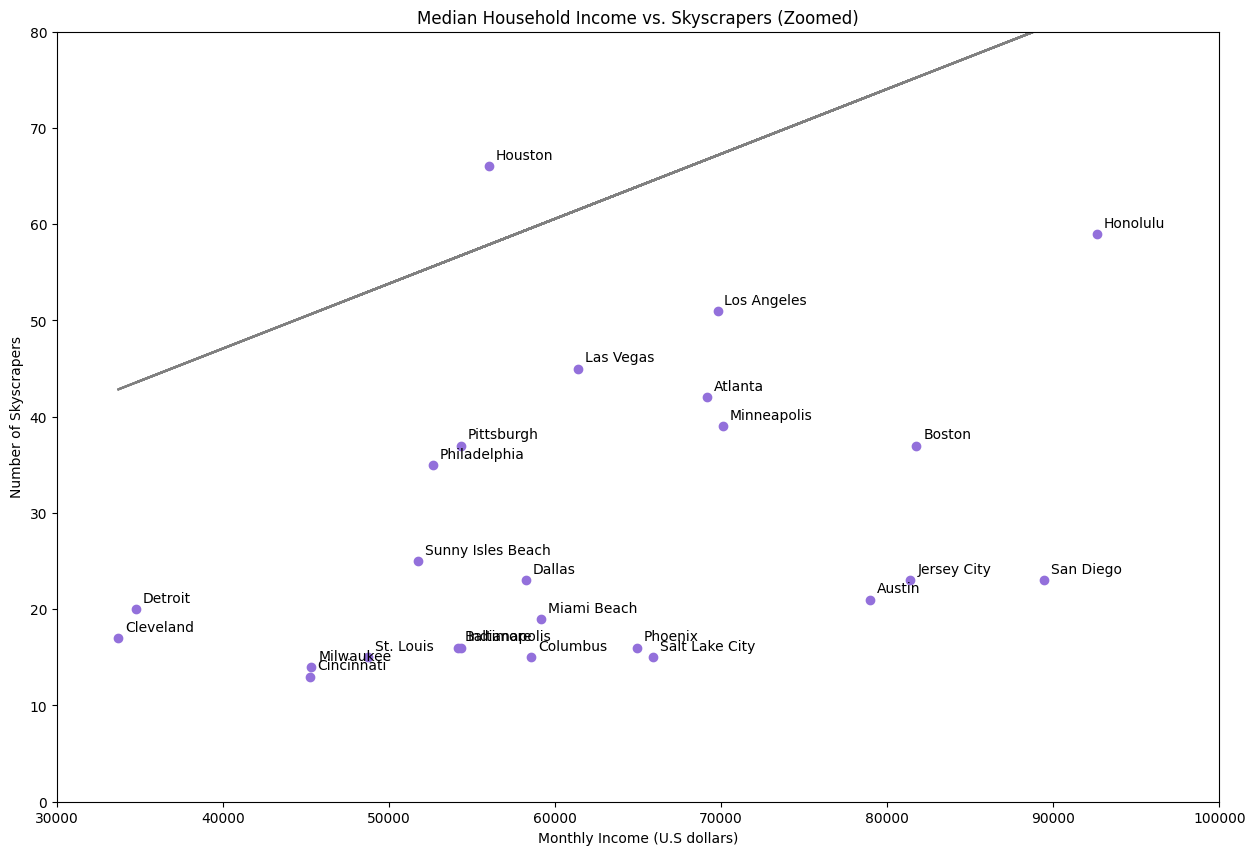

0.012779659043814449


In [22]:
fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Median household income (in 2021 dollars), 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='mediumpurple')
ax.set_title('Median Household Income vs. Skyscrapers')
ax.set_xlabel('Monthly Income (U.S dollars)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Median household income (in 2021 dollars), 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

x = city_sky['Median household income (in 2021 dollars), 2017-2021'].values
y = city_sky['Skyscraper'].values
ax.scatter(x, y, color='mediumpurple')
ax.set_title('Median Household Income vs. Skyscrapers (Zoomed)')
ax.set_xlabel('Monthly Income (U.S dollars)')
ax.set_ylabel('Number of Skyscrapers')
for i, row in city_sky.iterrows():
    city = row['City']
    x1 = row['Median household income (in 2021 dollars), 2017-2021']
    y2 = row['Skyscraper']
    ax.annotate(city, xy=(x1, y2), xytext=(5, 5), textcoords='offset points')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='gray')
ax.set_xlim([30000, 100000])
ax.set_ylim([0, 80])

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, slope*x + intercept, color='gray')
r_squared = rvalue**2

plt.show()

print(r_squared)

**Figure 12.** Scatter plot of the median monthly household income, in U.S dollars, and the number of skyscrapers in a city (R-squared: ~0.013)

|  Census Variable of Interest | Trend (+/-) | R-squared |
| --- | --- | --- |
| Population Density | + | 0.35 |
| Travel Time to Work | + | 0.40 |
| Population | + | 0.71 |
| Owner Occupied Housing Rate | - | 0.072 |
| Median Gross Rent | + | 0.027 |
| Median Household Income | + | 0.013 |


**Table 1.** Summary of the analysis with the variables of interest (Trends indicated as positive/negative)

# 4. Discussion

Skyscraper materials have become increasingly dominated by concrete and steel structures (Figure 5). In recent decades, there has been an increase in a mix of using both concrete and steel, and also composite materials. Masonry and precast were used sporadically from the mid-1800s to 1900s, respectively, but have phased out as steel skyscrapers took over. This could be due to that masonry and precast materials do not result in high rises. When compared to other materials, the average height of masonry and precast materials is at the lowest (Figure 6). The tallest buildings are composite, and a mix of steel and concrete. This could be the main reason why many skyscrapers are built with these materials, to support higher buildings. 

The first variable analyzed in the Census Data was the population density or population per square mile. The number of skyscrapers can correlate to the population density of a city since more people are living in these areas. When looking at the relationship, Chicago and New York City seem to have the most skyscrapers; however, the population density of Sunny Isles Beach, Jersey City, and San Francisco is much higher than Chicago (Figure 7). In the zoomed-in plot, some cities have a such low population density that the points are hard to interpret. Overall, there is a slightly positive trend between population density and skyscrapers, which means that in cities where there are more skyscrapers, the population density is higher. This is expected as skyscrapers tend to be more concentrated, resulting in a higher population in less area. Nonetheless, it is still surprising to see the low r2 of 0.35, meaning there is only a slight positive correlation between the two. The second variable is the mean travel time to work. While cities with more skyscrapers are expected to have less travel time due to the convenience of having everything within reach, the results tell a different story. When looking at the mean travel time to work in different cities, New York City and Jersey City have the longest times (Figure 8). This means that while New York City has the most skyscrapers, people take the longest time to commute to work. There is a positive correlation between the two variables with an r2 of 0.40. This positive trendline indicates that more skyscrapers in the city results in longer commute time. An explanation is due to most of these skyscrapers not being a combination of residential and commercial spaces, but strictly commercial. This means more people have to commute from outside of the city to these commercial skyscrapers, which will result in a long time due to traffic. The variable with the most correlation is the population. Figure 9 shows the general population of a city compared to the number of skyscrapers. The resulting plot has an  r2 of ~0.71, which indicates a strong positive correlation between the two variables. In cities where there is a higher population, the number of skyscrapers also increases. This is expected as cities with skyscrapers tend to be downtown areas, big cities where much of the population lives. This can not be compared to the population density, which includes the land area of the city. This means that the land area of a city is important in determining the relationship as the  r2 is significantly lower when population density is compared. 

Three more variables were analyzed: owner-occupied housing rate, median gross rent, and median household income; however, none of these variables had little to no correlation with the number of skyscrapers in the city. The owner-occupied housing rate had a slight negative correlation, while the median rent and household income had a slightly positive correlation. It is interesting to see that in cities with more skyscrapers, the rent and income do not have an obvious trend. From observations, it would seem that rent in cities with more skyscrapers would have higher rent as it is a convenient place that is more sought after and with less land; however, that is not the case. Looking at the median income, if we ignore the cities with many skyscrapers such as New York City and Chicago, it does seem as if there is a slightly positive trend as well. However, it is important to note that with such low  r2 values, these conclusions can not be proven and speculations of their correlation can not be made.  From the variables analyzed, the most important variables are population density, travel time to work, and the population. As to whether or not skyscrapers can save a city, more research needs to be done. The saying that living in cities with more skyscrapers “can save the city” is seen to be false here with the preliminary results and variables. Cities with more skyscrapers have more people which often results in longer commute times. As to whether or not skyscrapers can save a city, more research is needed to be done.   

**4.1 - Further Research & Limitations**

Further research can analyze the specific purposes of the buildings. The purpose of the buildings such as separating them into commercial, retail, and housing, can provide more insight as to whether these cities with skyscrapers are mainly for people to live in or people to travel to for work. Knowing these variables can be useful in analyzing cities with many skyscrapers such as New York City and Chicago. These variables can help us understand the relationship more as to if skyscrapers can really save a city. Another way is to specifically look at cities with many skyscrapers and the counties around them. As some cities cross many counties, knowing the demographics of the county can provide more information on the mean travel time and the effectiveness of skyscrapers. Additionally, many papers mentioned the benefits of skyscrapers as making cities greener. Yearly emission data of each city can be looked at to see if there is a falling trend in greenhouse gases compared to a rising trend in skyscrapers. Furthermore, buildings in a specific city can be mapped and each census tract data can be looked at for a more in-depth and detailed analysis of big cities with many skyscrapers. 

## 5. References

Florida, Richard. “Skyscrapers, the Pros and Cons.” Bloomberg.com, Bloomberg, 28 Jan. 2016, https://www.bloomberg.com/news/articles/2016-01-28/skyscrapers-the-pros-and-cons. 

Glaeser, Edward. “How Skyscrapers Can Save the City.” The Atlantic, Atlantic Media Company, 19 Feb. 2014, https://www.theatlantic.com/magazine/archive/2011/03/how-skyscrapers-can-save-the-city/308387/. 